<a href="https://colab.research.google.com/github/faressoltani55/SingleNeuronNeuralNetwork/blob/master/Single_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Notebook, we are going to create a single neural network from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Initializing W and b randomly

In [ ]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

Get neuron result

In [ ]:
def get_neuron_result(X, W, b):
  # Aggregation function
  Z = X.dot(W) + b
  # 
  A = 1 / (1 + np.exp(-Z))
  return A

Defining the log loss function

In [ ]:
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

Defining the gradient function

In [ ]:
def gradient(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A-y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

Defining the W and b update function

In [ ]:
def upadate(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

Define prediction function

In [ ]:
def predict(X, W, b):
  A = get_neuron_result(X, W, b)
  return 1 if A >= 0.5 else 0

Creating an artificial neuron

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  W, b = initialisation(X)
  # We'll record the loss so we can display it
  losses = []

  for i in range(n_iter):
    A = get_neuron_result(X, W, b)
    losses.append(log_loss(A, y))
    dW, db = gradient(A, X, y)
    W, b = upadate(dW, db, W, b, learning_rate)

  return (W, b, losses)

Display losses function

In [ ]:
def display_losses_curve(losses):
  plt.plot(losses)
  plt.show()

Print metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def display_metrics(X, y, W, b):
  y_pred = []
  for x in X:
    y_pred.append(predict(x, W, b))
  print("Accuracy: " + str(accuracy_score(y, y_pred)))
  print("Precision: " + str(precision_score(y, y_pred)))
  print("Recall: " + str(recall_score(y, y_pred)))

Try Running the code on the plants dataset from sklearn. First, let's diaplay the data we have.

dimensions de x (100, 2)
dimensions de x (100, 1)


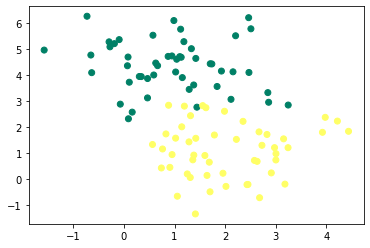

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de x', X.shape)
print('dimensions de x', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

Inspect data

In [ ]:
print(X[0])

[4.21850347 2.23419161]


Train the model

In [ ]:
W, b, losses = artificial_neuron(X, y)

Display metrics

In [ ]:
display_metrics(X, y, W, b)

Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84


Display the loss evolution

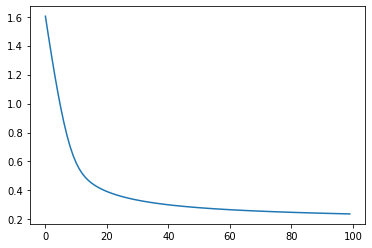

In [ ]:
display_losses_curve(losses)

Create a test case

Our new plant belongs to the class : Yellow


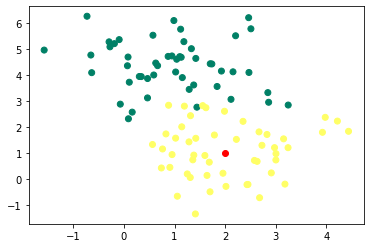

In [ ]:
new_plant = np.array([2, 1])
res = str(predict(new_plant, W, b))
print("Our new plant belongs to the class : " + ("Yellow" if res else "Green"))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()